In [9]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import pickle
import tensorflow as tf
import dataclasses
from tqdm.notebook import tqdm
from smart.metrics.real_metrics.custom_metrics import MetricFeatures, RealMetrics

all_log_features = {}
all_sim_features = {}
for field in dataclasses.fields(MetricFeatures):
    all_log_features[field.name] = tf.zeros((0, 80), dtype=tf.float32)
    all_sim_features[field.name] = tf.zeros((0, 80), dtype=tf.float32)


scenario_real_metrics = r"/mnt/i/output_20241021_epoch07/real_metrics"
for file in tqdm(os.listdir(scenario_real_metrics), desc="Processing files"):
    with open(os.path.join(scenario_real_metrics, file), 'rb') as handle:
        data = pickle.load(handle)

    for field, feature in all_log_features.items():
        all_log_features[field] = tf.concat([feature, getattr(data.log_features, field)], axis=0)

    for field, feature in all_sim_features.items():
        all_sim_features[field] = tf.concat([feature, getattr(data.sim_features[0], field)], axis=0)

2024-11-14 13:40:57.422067: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-14 13:40:57.453871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-14 13:40:57.454066: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-14 13:40:57.457856: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-14 13:40:57.458020: I tensorflow/compile

Processing files:   0%|          | 0/1000 [00:00<?, ?it/s]

JS(linear_accel) = 0.16442006746157906


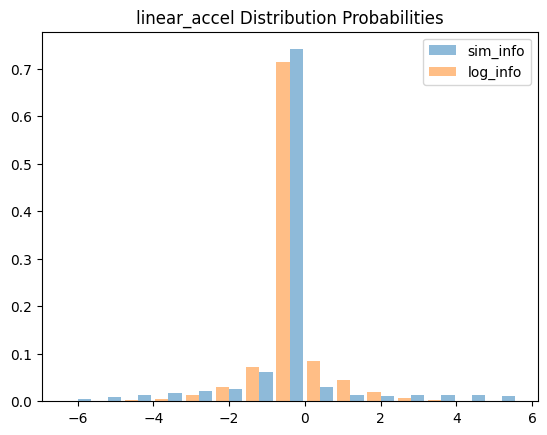

--------------------------------------------------

JS(linear_speed) = 0.028430657978481096


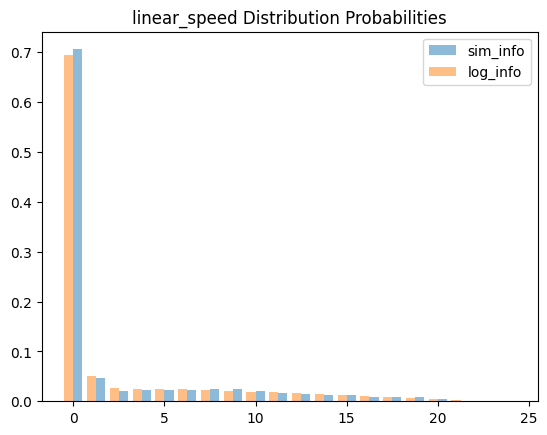

--------------------------------------------------

JS(yaw_speed) = 0.18271391647649984


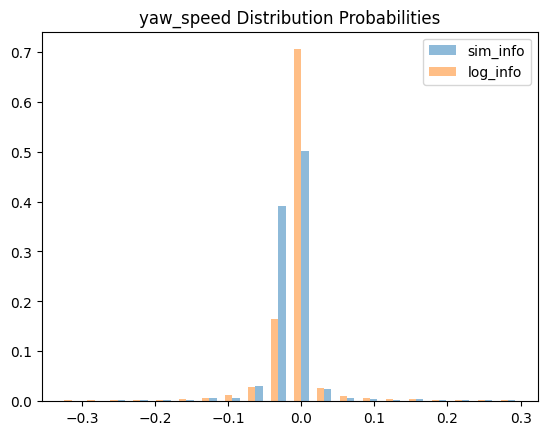

--------------------------------------------------

JS(yaw_accel) = 0.21826894692692064


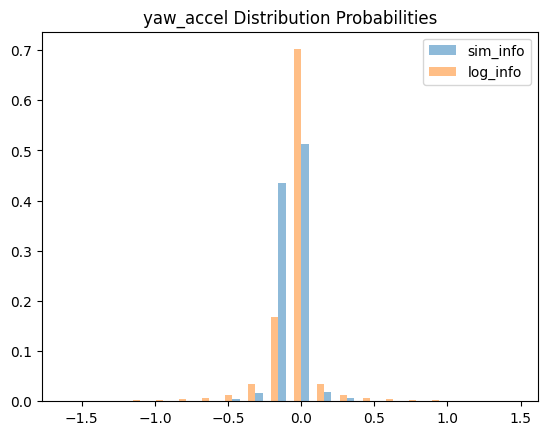

--------------------------------------------------

JS(relative_distance) = 0.04408958911120926


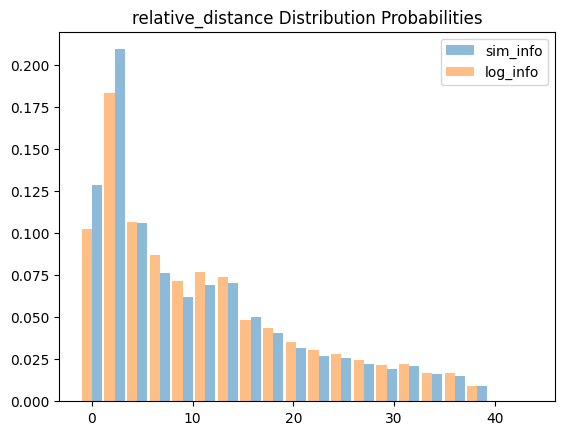

--------------------------------------------------

JS(relative_speed) = 0.12649883270102047


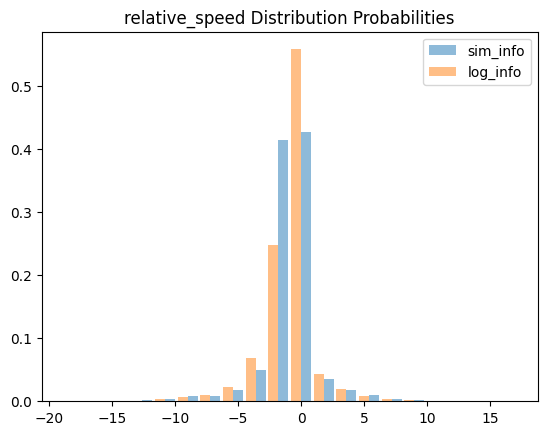

--------------------------------------------------

JS(relative_accel) = 0.1990228699740628


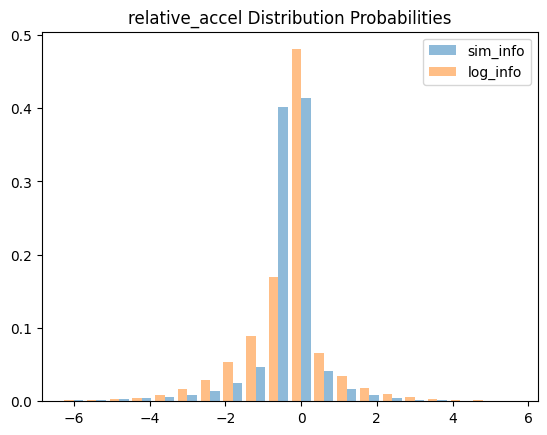

--------------------------------------------------

JS(ttc) = 0.052598230023801144


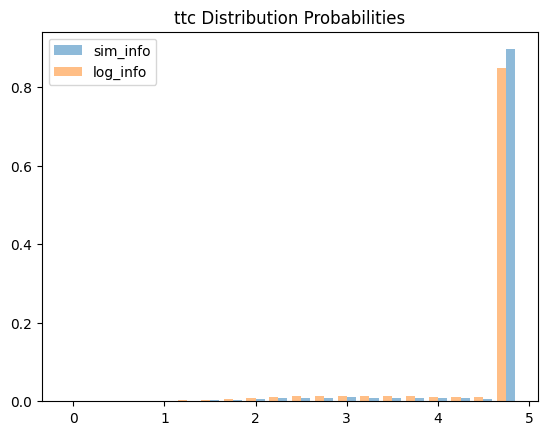

--------------------------------------------------

{'linear_accel': 0.16442006746157906, 'linear_speed': 0.028430657978481096, 'yaw_speed': 0.18271391647649984, 'yaw_accel': 0.21826894692692064, 'relative_distance': 0.04408958911120926, 'relative_speed': 0.12649883270102047, 'relative_accel': 0.1990228699740628, 'ttc': 0.052598230023801144}


In [10]:
real_metrics = RealMetrics()
real_metrics.config['linear_accel'] = {
    'min_val': -6.0,
    'max_val': 6.0,
    'num_bins': 15,
    'bar_width': 0.35,
}
real_metrics.config['yaw_speed'] = {
    'min_val': -0.314,
    'max_val': 0.314,
    'num_bins': 20,
    'bar_width': 0.01,
}

log_metrics = MetricFeatures(**all_log_features)
real_metrics.add_log_features(log_metrics)
sim_metrics = MetricFeatures(**all_sim_features)
real_metrics.add_sim_features(sim_metrics)
real_metrics.compute_js_divergence(
    method='histogram',  #! kernel为核密度估计，histogram为直方图估计
    plot=True            #! 是否打印结果
)
print(real_metrics.js_divergence)